# Working with t-tests

Below are 5 sets of data. Each of them have questions which can be addressed using a t-test. For each dataset:

1. Identify the research question
2. Choose the appropriate t-test
3. Do the t-test in Python (see chapter and/or slides for code)
4. Report your results using the APA format, just like in the examples in the book (e.g. With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05))
5. Make a figure which illustrates the results

NB: for some of these data sets, you may have to re-arrange the data a little before you can do your analysis! If the data are in long format, where there is a column with a grouping variable, like the example below, an easy way to get data out so they can be entered in a t-test is to make two new variables, like this:

| ID number | Group  | Measure |
| :-------: | :----: | :-----: |
|     1     | A      |   32    |
|     2     | B      |  43.2   |
|     3     | A      |  31.2   |
|     4     | B      |  22.1   |

Group1 = pd.DataFrame(df.loc[df['Group'] == 'A']['Measure'])

Group2 = pd.DataFrame(df.loc[df['Group'] == 'B']['Measure'])

Now the t-test can be done with Group1 and Group2.

## Dataset 1: "Moon and Aggression"

Description:

This data set, "Moon & Aggression", provides the number of disruptive behaviors by dementia patients during two different phases of the lunar cycle (Moore et al, 2012, p. 410). Each row corresponds to one participant.

Variables:

Moon: The average number of disruptive behaviors during full moon days.  
Other: The average number of disruptive behaviors during other days.  

Assignment:
Examine the adequacy of the null hypothesis which states that the average number of disruptive behaviors among patients with dementia does not differ between moon days and other days. Calculate an appropriate test statistic, and make a figure illustrating the comparison. Write a sentence reporting your results in the same way they are reported in the book (APA format): 

> With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05)

References:

Moore, D. S., McCabe, G. P., and Craig. B. A. (2012) Introduction to the Practice of Statistics (7th ed). New York: Freeman.

"These data were collected as part of a larger study of dementia patients conducted by Nancy Edwards and Alan Beck, Purdue University." (Moore et al, 2012, p. N-8). 

In [35]:
# import all the packages I'll need
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:

df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/JASP_data_library/2.%20T-Tests/Moon%20and%20Aggression.csv')
df

,Moon,Other
0,3.33,0.27
1,3.67,0.59
2,2.67,0.32
3,3.33,0.19
4,3.33,1.26
5,3.67,0.11
6,4.67,0.30
7,2.67,0.40
8,6.00,1.59
9,4.33,0.60


In [37]:

moon = df['Moon']
other = df['Other']
res = pg.ttest(moon, other, paired = True)
res

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.451789,14,two-sided,0.000015,"[1.62, 3.24]",2.200516,1521.058,1.0


In [38]:
# make the data long for plotting
df_long = df.melt()
df_long

,variable,value
0,Moon,3.33
1,Moon,3.67
2,Moon,2.67
3,Moon,3.33
4,Moon,3.33
5,Moon,3.67
6,Moon,4.67
7,Moon,2.67
8,Moon,6.00
9,Moon,4.33


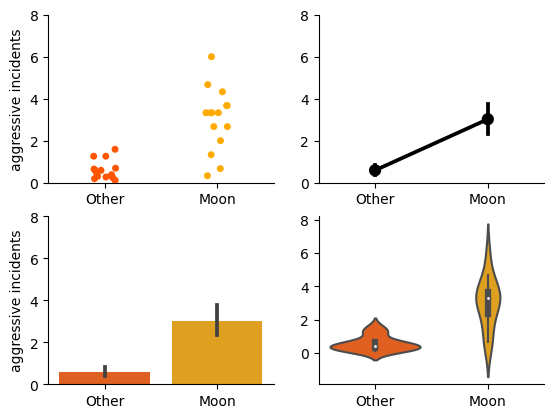

In [39]:
# Here are some different plot types. 
# There is no reason to use all of these, but I wanted to show you some options.
# They all show the same data

fig, axes = plt.subplots(2,2)

# I want Other to be on the left and Moon to be on the right. I just like it better that way.
order=['Other', 'Moon']

sns.stripplot(data = df_long, x = 'variable', y = 'value', ax = axes[0,0], palette = "autumn", order=order).set(ylabel='aggressive incidents', 
xlabel='')


sns.pointplot(data = df_long, x = 'variable', y = 'value', ax = axes[0,1], color = 'black', order=order).set(ylabel='', xlabel='')

sns.barplot(data = df_long, x = 'variable', y = 'value', ax = axes[1,0], palette = "autumn", order=order).set(ylabel='aggressive incidents', xlabel='')

sns.violinplot(data = df_long, x = 'variable', y = 'value', ax = axes[1,1], palette = "autumn", order=order).set(ylabel='', xlabel='')

# Set the y-axis to be the same for all plots (from 0 to 8)
axes[0,0].set_ylim(0, 8)
axes[0,0].set_ylim(0, 8)
axes[1,0].set_ylim(0, 8)
axes[0,1].set_ylim(0, 8)

sns.despine()


In [40]:
# reporting the results

# calculate the means
m1 = df['Moon'].mean().round(3)
m2 = df['Other'].mean().round(3)

# Extract t, dof, and p values from the test result
dof = int(res['dof'])
t = res['T'][0].round(3)
p = res['p-val'][0].round(5)

print(f'There were significantly more aggressive incidents when the moon was full (M: {m1}) than when the moon was not full (M: {m2}) (t({dof}) = {t}, p = {p}).')

There were significantly more aggressive incidents when the moon was full (M: 3.022) than when the moon was not full (M: 0.589) (t(14) = 6.452, p = 2e-05).


We can look at doing a t-test as investingating whether our theoretical model does a good job of accounting for the variance in the data or not. In the figure below we can look at the variance with no model (left), a model based on the moon phase (middle), and a model based on whether the row number for each participant in the dataframe was odd or even (right). Clearly (and luckily for our research!), looking at the moon phase tells us more about the variation in the data than looking at the row number in the dataframe.

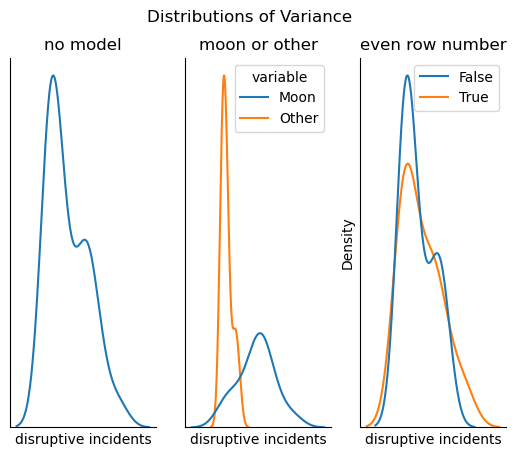

In [41]:
fig, axes = plt.subplots(1,3)
fig.suptitle('Distributions of Variance')
sns.kdeplot(data=df_long, x = 'value', ax = axes[0]).set_title('no model')
sns.kdeplot(data=df_long, x = 'value', hue='variable', ax = axes[1]).set_title('moon or other')
sns.kdeplot(data=df_long, x='value', hue=df_long.index % 2 == 0, ax=axes[2]).set_title('even row number')
axes[0].set_ylabel('')
axes[1].set_ylabel('')
for ax in axes:
    ax.set_xlabel('disruptive incidents')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
sns.despine()


## Dataset 2: "Horizontal Eye Movements"

Description:

This data set, "Horizontal Eye Movements", provides the number of recalled words by two groups of participants - during the retention inverval, one group was isntructed to fixate on a centrally presented dot; the other group was instructed to execute horizontal saccades. Specifically, 

"Participants were presented with a list of neutral study words for a subsequent free recall test. Prior to recall, participants were requested to perform - depending on the experimental condition - either horizontal, vertical, or no eye movements (i.e., looking at a central fixation point). The type of eye movement was thus manipulated between subjects. As the effect of eye movement on episodic memory has been reported to be influenced by handedness, we tested only strong right-handed individuals. The dependent variable of interest was the number of correctly recalled words.'' (Matzke et al, 2015, p. 3)

This data set contains only data from participants assigned to the horizontal and no eye movements condition. 


Variables:

ParticipantNumber - Participant's identification number.  
Condition - Experimental condition (Fixed = fixed gaze, Horizontal = horizontal eye movements).  
CriticalRecall - The number of Recalled words after the memory retrieval task.   

Assignment:
Examine whether the data are more likely to occur if horizontal eye movements do not help memory retrieval (null hypothesis), or _if they have a positive effect on the memory retrieval (one-sided alternative hypothesis)_. Calculate an appropriate test statistic, and make a figure illustrating the comparison. Write a sentence reporting your results in the same way they are reported in the book (APA format): 

> With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05)

Reference:

Matzke, D., Nieuwenhuis, S., van Rijn, H., Slagter, H. A., van der Molen, M. W., and Wagenmakers, E.-J. (2015). The effect of horizontal eye movements on free recall: A preregistered adversarial collaboration. Journal of Experimental Psychology: General: 144:e1-e15.

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/JASP_data_library/2.%20T-Tests/Eye%20Movements.csv')

In [43]:
df.head()

,ParticipantNumber,Condition,CriticalRecall
0,1,Horizontal,4
1,3,Fixation,14
2,4,Horizontal,12
3,6,Fixation,4
4,7,Horizontal,11


In [44]:
group1 = df[df['Condition'] == 'Horizontal']
group2 = df[df['Condition'] == 'Fixation']

test2 = pg.ttest(group1['CriticalRecall'], group2['CriticalRecall'], paired = False, alternative = 'greater')
test2

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.823413,40.268769,greater,0.996324,"[-7.04, inf]",0.813105,0.077,0.000004


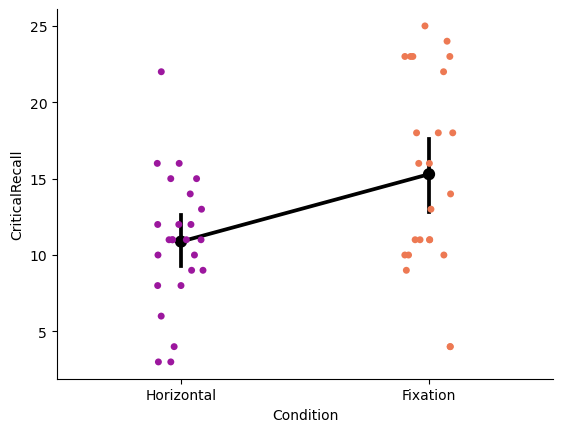

In [46]:
fig, ax = plt.subplots()

sns.stripplot(data = df, x = 'Condition', y = 'CriticalRecall', ax = ax, palette = "plasma")
sns.pointplot(data = df, x = 'Condition', y = 'CriticalRecall', ax = ax, color = 'black')
sns.despine()
plt.show()

In [47]:
# Calculate means for each group
mean_horizontal = group1['CriticalRecall'].mean().round(2)
mean_fixation = group2['CriticalRecall'].mean().round(2)

# Extract t, dof, and p values from the test result
t_value = test2['T'].values[0].round(2)
dof_value = int(test2['dof'].values[0])
p_value = test2['p-val'].values[0].round(5)

# Report the results in APA format
print(f'Participants in the horizontal eye movements condition (M = {mean_horizontal}) did not recall significantly more words than participants in the fixation condition (M = {mean_fixation}) (t({dof_value}) = {t_value}, p = {p_value}).')

Participants in the horizontal eye movements condition (M = 10.88) did not recall significantly more words than participants in the fixation condition (M = 15.29) (t(40) = -2.82, p = 0.99632).


## Dataset 3: "Laser Blue Jeans"

Description: 

Experiment comparing tensile strength and extension of blue
jeans that were designed using two methods: manually and with laser beams. Designers of blue jeans often want to treat areas of the jeans to give them a faded look by blasting them with quartz sand under high pressure. The areas to be treated with sand need to be marked out; this is traditionally done by hand with a pen, but this is very time-consuming. A quicker way would be to use lasers to mark the areas, but how does this affect the strength and stretchability of the material? To test this, the authors treated 20 pairs of jeans with each design method, then took 3 samples from different parts of each pair of jeans, giving a total sample size of N = 2 x 20 x 3 = 120. The samples were tested for tensile strength and extension by pulling the fabric samples between two hooks until they ripped.

<img src="https://github.com/ethanweed/ExPsyLing/blob/master/Slides/Images/LaserJeans.png?raw=true" width=""/>

Figure 1: Some examples of denim trousers designed by laser beam method (from Ondogan et al, 2005)

Assignment:

Determine whether the tensile strength and extension of the blue jeans was significantly different using the time-saving laser technique. Calculate an appropriate test statistic, and make a figure illustrating the comparison. Write a sentence reporting your results in the same way they are reported in the book (APA format): 

> With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05)


Variables:

method: 1 = manual, 2 = laser  
jeanid  
sampleid  
strength (Newtons)  
extension (Newtons)  


Reference: 

Z. Ondogan, O. Pamuk, E.N. Ondogan, A. Ozguney (2005).
"Improving the Appearance of All Textile Products from Clothing to Home
Textile Using Laser Technology," Optics and Laser Technology, Vol. 37,
pp. 631-637.




In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/university_of_florida/bluejeans_laser.csv')
df

,method,jeanid,sampleid,strength,extension
0,1,1,1,1266,68.06
1,1,2,1,1099,61.54
2,1,3,1,1068,40.48
3,1,4,1,1266,59.83
4,1,5,1,968,55.89
...,...,...,...,...,...
115,2,36,3,1198,69.73
116,2,37,3,1223,69.42
117,2,38,3,1289,80.39
118,2,39,3,1339,71.40


In [54]:
# group 1 and group2

group1 = df.loc[df['method'] == 1] # manual
group2 = df.loc[df['method'] == 2] # laser

group2.head()

,method,jeanid,sampleid,strength,extension
20,2,21,1,1279,75.52
21,2,22,1,1197,71.44
22,2,23,1,1083,44.16
23,2,24,1,1418,70.56
24,2,25,1,1273,69.13


In [57]:
# strength

test3 = pg.ttest(group1['strength'], group2['strength'])
test3


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-12.802569,118,two-sided,4.625617e-24,"[-237.69, -174.01]",2.337419,5.636e+20,1.0


In [58]:
#extension
test4 = pg.ttest(group1['extension'], group2['extension'])
test4

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.263948,118,two-sided,0.000041,"[-9.2, -3.37]",0.778487,485.658,0.988367


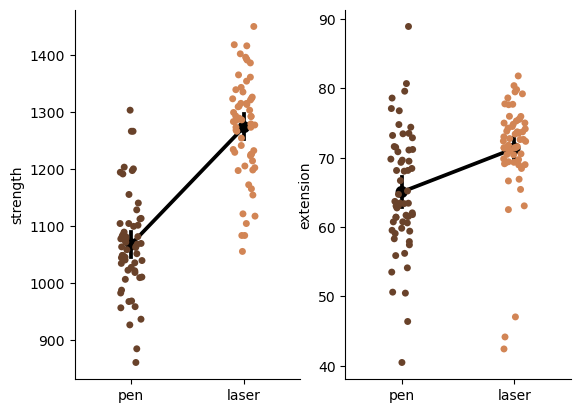

In [59]:
fig, axes = plt.subplots(1,2)

sns.stripplot(data = df, x = 'method', y = 'strength', ax = axes[0], palette = 'copper')

sns.pointplot(data = df, x = 'method', y = 'strength', ax = axes[0], color = 'black')

sns.pointplot(data = df, x = 'method', y = 'extension', ax = axes[1], color = 'black')

sns.stripplot(data = df, x = 'method', y = 'extension', ax = axes[1], palette = 'copper')



for ax in axes:
    ax.set_xlabel('')
    ax.set_xticklabels(['pen', 'laser'])
sns.despine()

In [60]:
# Extract t, dof, and p values from the test results
t_value_strength = test3['T'].values[0].round(2)
dof_strength = int(test3['dof'].values[0])
p_value_strength = test3['p-val'].values[0].round(5)

t_value_extension = test4['T'].values[0].round(2)
dof_extension = int(test4['dof'].values[0])
p_value_extension = test4['p-val'].values[0].round(5)

# Calculate means for each group
mean_strength_manual = group1['strength'].mean().round(2)
mean_strength_laser = group2['strength'].mean().round(2)
mean_extension_manual = group1['extension'].mean().round(2)
mean_extension_laser = group2['extension'].mean().round(2)

# Report the results in APA format
print(f'The tensile strength of jeans designed manually (M = {mean_strength_manual}) was significantly different from those designed with laser (M = {mean_strength_laser}) (t({dof_strength}) = {t_value_strength}, p < {p_value_strength}).')
print(f'The extension of jeans designed manually (M = {mean_extension_manual}) was significantly different from those designed with laser (M = {mean_extension_laser}) (t({dof_extension}) = {t_value_extension}, p < {p_value_extension}).')

The tensile strength of jeans designed manually (M = 1067.43) was significantly different from those designed with laser (M = 1273.28) (t(118) = -12.8, p < 0.0).
The extension of jeans designed manually (M = 65.06) was significantly different from those designed with laser (M = 71.34) (t(118) = -4.26, p < 4e-05).



## Dataset 4: "Southern Crime"

Description:

This dataset contains a variety of data on crime rates in different states in the United States. 

| CrimeRate          | Crime rate (number of offences per million population)             | Continuous |
|--------------------|--------------------------------------------------------------------|------------|
| Youth              | Young males (number of males aged 18-24 per 1000)                  | Discrete   |
| Southern           | Southern state 1 = yes, 0 = no                                     | Binary     |
| Education          | Education time (average number of years schooling up to 25)        | Discrete   |
| ExpenditureYear0   | Expenditure (per capita expenditure on police)  skewed             | Continuous |
| LabourForce        | Youth labour force (males employed 18-24 per 1000)                 | Discrete   |
| Males              | Males (per 1000 females)                                           | Discrete   |
| MoreMales          | More males identified per 1000 females 1 = yes, 0 = no             | Binary     |
| StateSize          | State size (in hundred thousands)                                  | Discrete   |
| YouthUnemployment  | Youth Unemployment (number of males aged 18-24 per 1000) skewed    | Discrete   |
| MatureUnemployment | Mature Unemployment (number of males aged 35-39 per 1000)          | Discrete   |
| HighYouthUnemploy  | High Youth Unemployment 1 = yes, 0 = no (high if Youth >3*Mature ) | Binary     |
| Wage               | Wage (median weekly wage)                                          | Continuous |
| BelowWage          | Below Wage (number of families below half wage per 1000)           | Discrete   |


Assignment:
Examine whether there is a significant difference in crime rates between southern and northern states. Calculate an appropriate test statistic, and make a figure illustrating the comparison. Write a sentence reporting your results in the same way they are reported in the book (APA format): 

> With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05)

Source:
I'm still tracking down details on this one. But let's assume it is correct.

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/sheffield_MASH/crime.csv')

In [62]:
group1 = df.loc[df['Southern'] == 0] # northern
group2 = df.loc[df['Southern'] == 1] # southern

group2.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
10,79.8,142,1,12.9,45,533,969,0,18,94,...,44,552,969,0,19,93,36,0,378,247
14,85.6,166,1,11.4,58,521,973,0,46,72,...,54,543,983,0,47,76,25,1,568,246
19,96.8,151,1,10.0,58,510,950,0,33,108,...,56,515,1001,1,32,110,40,0,465,254


In [65]:
test5 = pg.ttest(group1['CrimeRate'], group2['CrimeRate'])
test5

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.400549,40.428033,two-sided,0.690861,"[-13.04, 19.49]",0.110563,0.322,0.064276


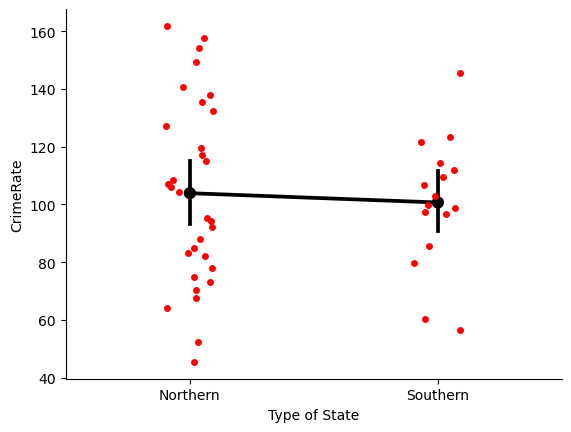

In [66]:
ax = sns.pointplot(data = df, x = 'Southern', y = 'CrimeRate', color = 'black')
ax = sns.stripplot(data = df, x = 'Southern', y = 'CrimeRate', color = 'red')
ax.set_xticklabels(['Northern', 'Southern'])
ax.set_xlabel('Type of State')
sns.despine()

In [67]:
# Extract t, dof, and p values from the test result
t_value = test5['T'].values[0].round(2)
dof_value = int(test5['dof'].values[0])
p_value = test5['p-val'].values[0].round(5)

# Calculate means for each group
mean_crime_rate_northern = group1['CrimeRate'].mean().round(2)
mean_crime_rate_southern = group2['CrimeRate'].mean().round(2)

# Report the results in APA format
print(f'The crime rate in northern states (M = {mean_crime_rate_northern}) was not significantly different from the crime rate in southern states (M = {mean_crime_rate_southern}) (t({dof_value}) = {t_value}, p = {p_value}).')

The crime rate in northern states (M = 103.91) was not significantly different from the crime rate in southern states (M = 100.68) (t(40) = 0.4, p = 0.69086).


## Dataset 5: "Weight Gain"

Description:

This data set, "Weight Gain", provides weights of 16 participants before and after an eight-week period of excessive calorie intake (Moore et al., 2012, p. 425).

Variables:

Weight Before: Weight in pounds (lb) measured before eight weeks of excessive calorie intake.  
Weight After: Weight in pounds (lb) measured after eight weeks of excessive calorie intake.  
Difference: Weight After - Weight Before.  

Assignment:

Test the hypothesis that 1000 excess calorie intake per day over 8 weeks results in 16 pounds (approximately 7.2 kilograms) weight increase. Calculate an appropriate test statistic, and make a figure illustrating the comparison. Write a sentence reporting your results in the same way they are reported in the book (APA format): 

> With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05) 

References:

Moore, D. S., McCabe, G. P., and Craig, B. A. (2012). Introduction to the Practice of Statistics (7th ed.). New York: Freeman.

Levine, J. A., Eberhardt, N. L., and Jensen, M. D. (1999) Role of nonexcercise activity thermogenesis in resistance to fat gain in humans. Science, 283:212-214.

In [68]:
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/JASP_data_library/2.%20T-Tests/Weight%20Gain.csv")

In [69]:
df

,Weight Before,Weight After,Difference
0,122.54,135.74,13.20
1,120.78,129.36,8.58
2,131.12,145.20,14.08
3,137.06,145.64,8.58
4,163.24,173.80,10.56
5,166.32,181.06,14.74
6,155.54,163.46,7.92
7,117.26,130.46,13.20
8,161.26,174.02,12.76
9,139.48,145.20,5.72


In [70]:
test6 = pg.ttest(df['Difference'], 16)
test6

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.82325,15,two-sided,0.000034,"[8.36, 12.46]",1.455813,750.535,0.999731


In our figure, we can show all the individual data points as blue dots, and a red dashed line showing the "expected" weight gain of 16 lbs. We can also add a single black dot to show the mean of all the blue dots. In this case, the actual mean weight increase 

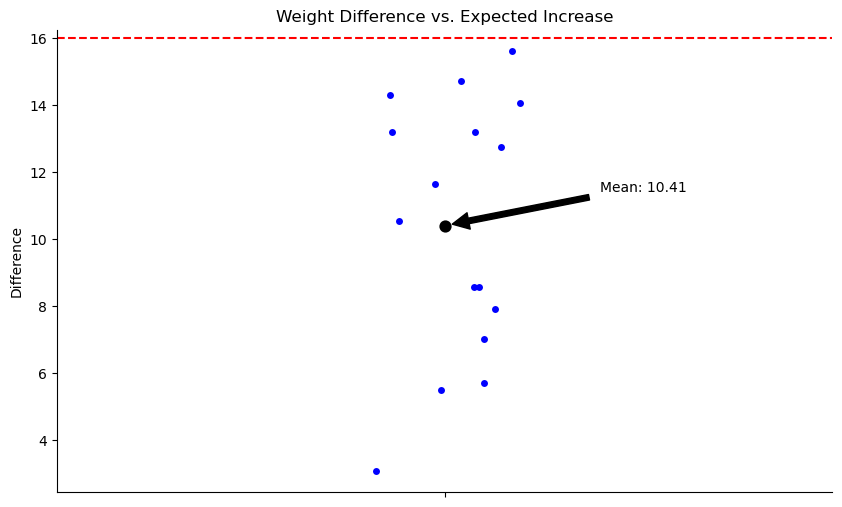

In [71]:
plt.figure(figsize=(10, 6))
ax = sns.stripplot(data=df, y='Difference', color='blue')
ax = sns.pointplot(data=df, y='Difference', color='black', ci=None)
mean_diff = df['Difference'].mean()
ax.annotate(f'Mean: {mean_diff:.2f}', xy=(0, mean_diff), xytext=(0.2, mean_diff + 1),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.axhline(y=16, color='red', linestyle='--')
plt.ylabel('Difference')
plt.title('Weight Difference vs. Expected Increase')
sns.despine()
plt.show()

In [72]:
# Extract t, dof, and p values from the test result
t_value = test6['T'].values[0].round(2)
dof_value = int(test6['dof'].values[0])
p_value = test6['p-val'].values[0].round(5)

# Calculate the mean difference
mean_diff = df['Difference'].mean().round(2)

# Report the results in APA format
print(f'The mean weight gain (M = {mean_diff}) was significantly different from the expected weight gain of 16 lbs (t({dof_value}) = {t_value}, p < {p_value}).')

The mean weight gain (M = 10.41) was significantly different from the expected weight gain of 16 lbs (t(15) = -5.82, p < 3e-05).
